(200, 4)
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


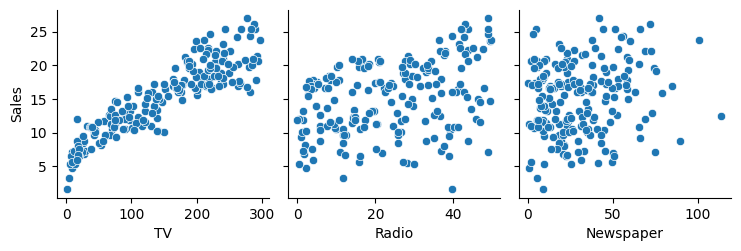

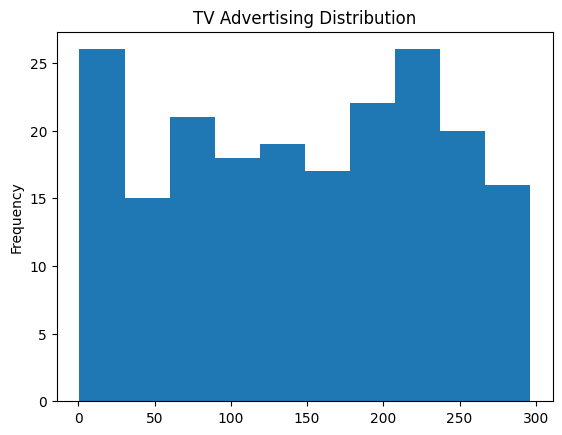

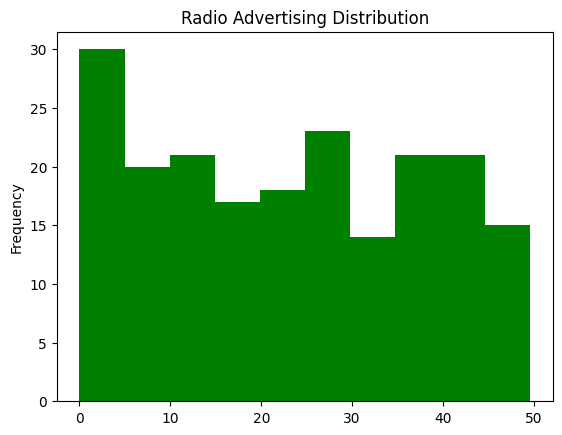

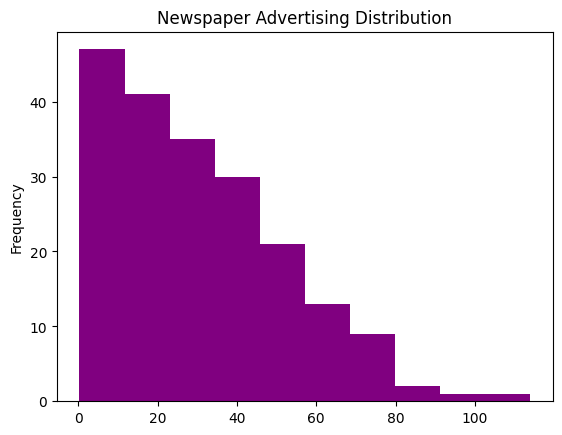

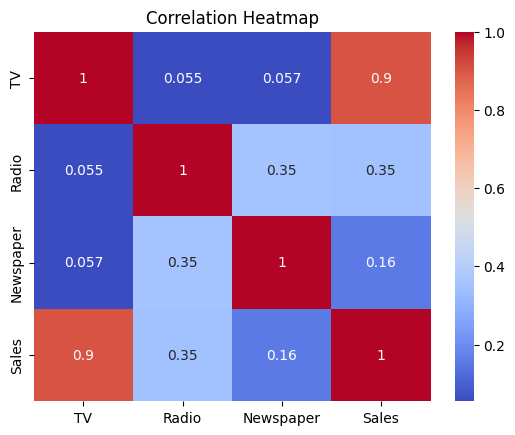

Mean Absolute Error: 1.1594875061090582
Mean Squared Error: 2.541624036229147
R2 Score: 0.9091484341849799
Intercept: 4.743766701589685
Coefficients:
     Feature  Coefficient
0         TV     0.053589
1      Radio     0.102707
2  Newspaper     0.007932


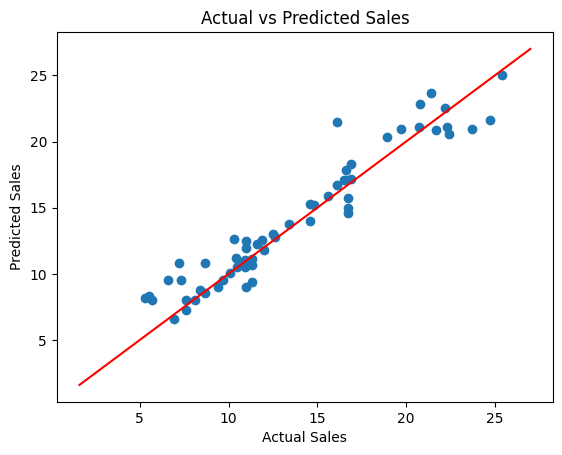

Predicted Sales: 16.180540141374095


In [2]:
# ==============================
# SALES PREDICTION USING MACHINE LEARNING
# ==============================

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Load Dataset
# ==============================
df = pd.read_csv("/content/advertising.csv")
df.head()

# ==============================
# Basic Exploration
# ==============================
print(df.shape)
print(df.describe())

# ==============================
# Data Visualization
# ==============================

# Pairplot to observe relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

# Distribution plots
df['TV'].plot.hist(bins=10, title="TV Advertising Distribution")
plt.show()

df['Radio'].plot.hist(bins=10, color="green", title="Radio Advertising Distribution")
plt.show()

df['Newspaper'].plot.hist(bins=10, color="purple", title="Newspaper Advertising Distribution")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ==============================
# Feature Selection
# ==============================

# Independent variables (advertising platforms)
X = df[['TV', 'Radio', 'Newspaper']]

# Target variable (Sales)
y = df['Sales']

# ==============================
# Train-Test Split
# ==============================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ==============================
# Model Building (Multiple Linear Regression)
# ==============================
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# ==============================
# Model Prediction
# ==============================
y_pred = model.predict(X_test)

# ==============================
# Model Evaluation
# ==============================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# ==============================
# Model Parameters
# ==============================
print("Intercept:", model.intercept_)
print("Coefficients:")
print(pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}))

# ==============================
# Visualization: Actual vs Predicted Sales
# ==============================
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r')
plt.show()

# ==============================
# Sample Prediction
# ==============================
sample_data = pd.DataFrame({
    'TV': [150],
    'Radio': [30],
    'Newspaper': [40]
})

predicted_sales = model.predict(sample_data)
print("Predicted Sales:", predicted_sales[0])
